<a href="https://colab.research.google.com/github/cho-jr/2020_cphys2/blob/master/2016017007%EC%A1%B0%EC%9E%AC%EB%A0%B9_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt

wine = load_wine()

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
print(wine['feature_names'])
print(wine['target_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [ ]:
import pandas as pd
import seaborn as sns

### 데이터 선별
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


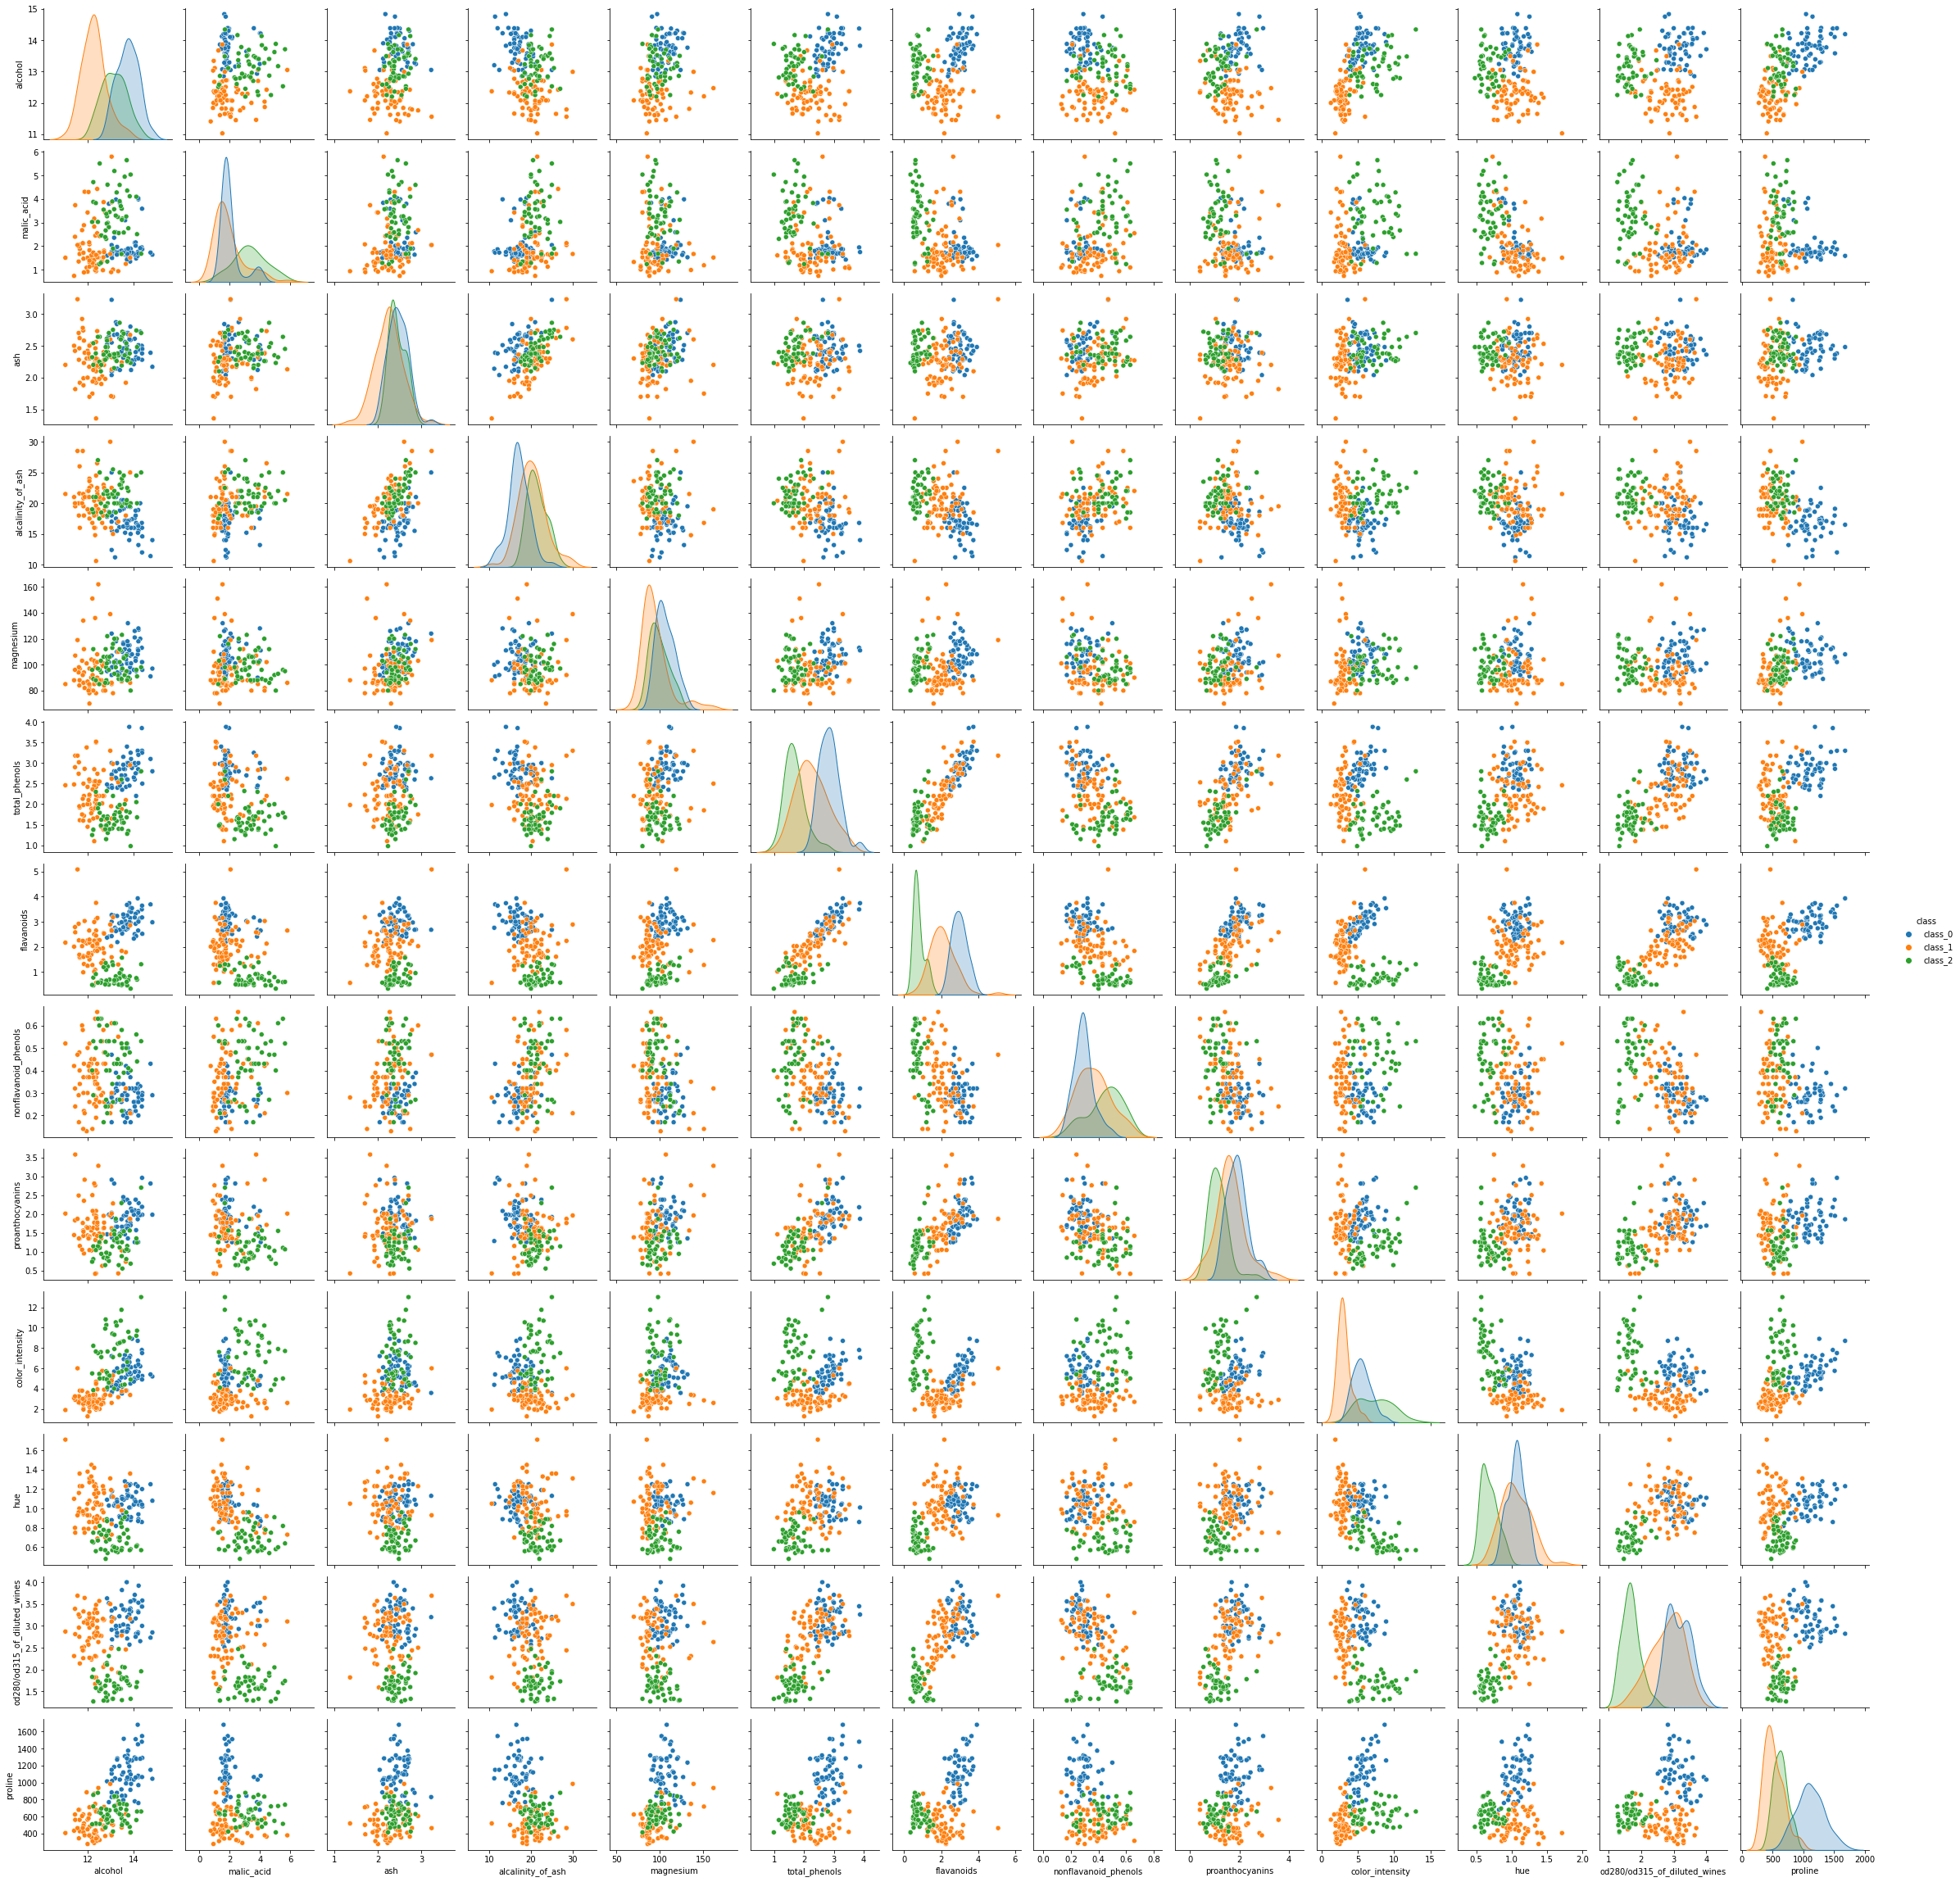

In [ ]:
sns.pairplot(df, hue='class')

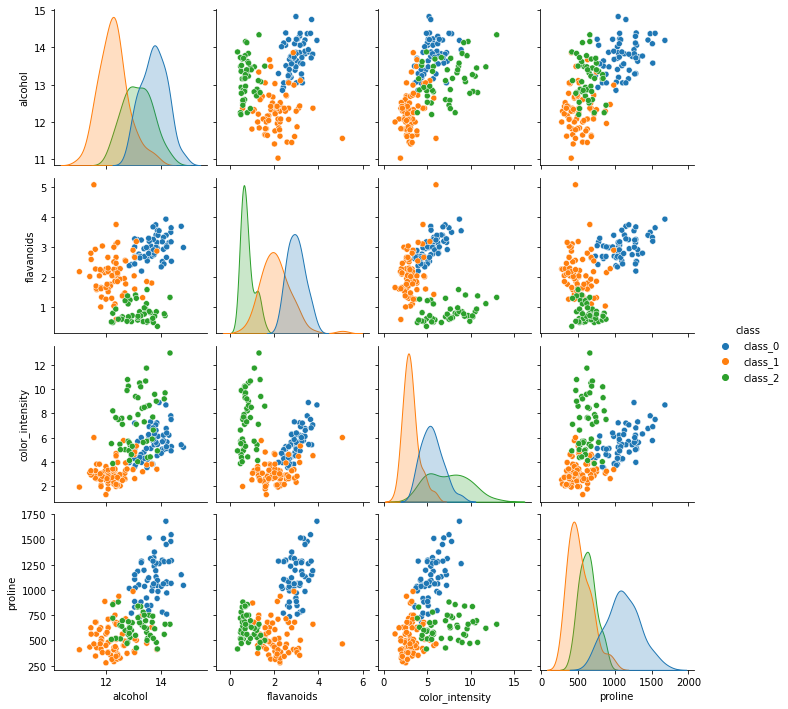

In [ ]:
#0, 6, 9, 12가 그나마 적절해보임 
df2 = df.iloc[:, [0, 6, 9, 12, 13]]
sns.pairplot(df2, hue='class')

In [ ]:
#0, 6번 데이터 선택

Xall = wine['data']
X = [Xall[:,0], Xall[:,6]]

In [ ]:
#0, 6번 데이터 선택

Xall = wine['data']
X = [Xall[:,0], Xall[:,6]]

#clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
data = np.transpose(X)
kmeans.fit(data)
result = kmeans.labels_

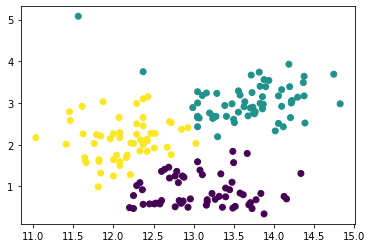

In [ ]:
plt.scatter(X[0], X[1], c = result)

In [ ]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1 0 1 2 1 2 0 2 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
y = wine['target']
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
kmeans.inertia_

78.96735265671241

In [ ]:
#0, 6번 정확도 
def acc(array1, array2):
  acc = sum(array1 == array2)/len(array1)
  return acc

acc(y, kmeans.labels_)

0.8932584269662921

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_te

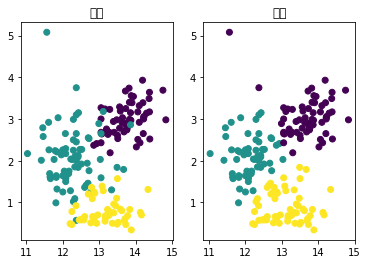

In [ ]:
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(X[0], X[1], c = y)
ax1.set_title('실제')

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(X[0], X[1], c = kmeans.labels_)
ax2.set_title('분류')
plt.show()

In [ ]:
#6, 12번 데이터 선택

X2 = [Xall[:,6], Xall[:,12]]

#clustering
data2 = np.transpose(X)
kmeans.fit(data2)
result2 = kmeans.labels_

print(result2)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1 0 1 2 1 2 0 2 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_te

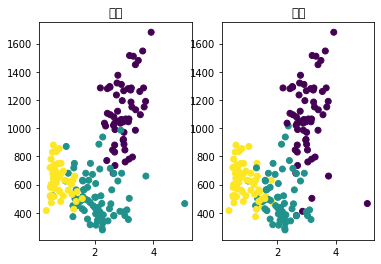

In [ ]:
ax1_2 = plt.subplot(1, 2, 1)
ax1_2.scatter(X2[0], X2[1], c = y)
ax1_2.set_title('실제')

ax2_2 = plt.subplot(1, 2, 2)
ax2_2.scatter(X2[0], X2[1], c = result2)
ax2_2.set_title('분류')
plt.show()


In [ ]:
acc(y, result2)

0.8932584269662921

 Scikit-learn의 wine 데이터를 분류하였다. 178개의 인스턴스가 13가지 화학적 속성 정보를 갖고, 3가지 클래스에 속해있다. 
 13가지 화학 성분 데이터와 각각의 관계를 이용하여 군집화 가능해보이는 데이터를 선별하였다. 시각화 하기 위해 pandas의 DataFrame을 이용해 전처리 한 후 seaborn의 pairplot을 사용하였다. 13개의 속성 중 두 속성을 선택해서 그 둘의 관계를 이용했다.  
 Scikit-learn의 KMeans를 사용해 클러스터링 해주었다. 3가지의 클래스 이므로 n_clusters는 3으로 설정했다. KMeans는 모듈을 호출하고 fit 함수 안에 데이터만 넣어주는 방식으로 간편하게 사용 가능하다. 
 kmeans가 분류한 것을 시각화 하기 위해 scatter 그림을 그리고 kmeans가 분류한 라벨로 색상을 구분했다. 실제값과 kmeans 분류값을 비교하였다. 
 올바르게 분류된 인스턴스 수를 전체 인스턴스 수로 나눠 정확도를 계산하였다. 약 89%로 10% 정도의 오차가 있다. 


